# Histogram diagnostic - Single histogram/PDF plot

The aim of this diagnostic is to visualise the probability density function (PDF) or histogram of a certain variable over a specified region.

In this notebook we demonstrate how to:
1. Compute a histogram using the `Histogram` class
2. Plot it using the `PlotHistogram` class
3. Optionally include reference data for comparison

In [1]:
%reload_ext autoreload
%autoreload 2

## Import the classes

In [2]:
from aqua.diagnostics import Histogram
from aqua.diagnostics import PlotHistogram

/home/b/b383197/miniforge3/envs/aqua-dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setup data dictionaries

We define:
- `dataset_dict`: Configuration for the model data
- `obs_dict`: Configuration for reference/observational data (optional)
- `common_dict`: Common parameters for both datasets

In [3]:
dataset_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'ICON',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly'
}

obs_dict = {
    'catalog': 'obs',
    'model': 'ERA5',
    'exp': 'era5',
    'source': 'monthly'
}

common_dict = {
    'startdate': '1990-01-01',
    'enddate': '1999-12-31',
    'bins': 100,              # Number of bins for histogram
    'weighted': True,         # Use latitudinal weights
    'loglevel': 'INFO'
}

## Compute histograms

We create `Histogram` objects for both model and reference data.
The `run()` method:
1. Retrieves the data from the catalog
2. Computes the histogram with `density=True` to get a PDF
3. Saves the result to a netCDF file

We'll analyze `tprate` (Total Precipitation Rate) in mm/day.

In [4]:
# Create Histogram objects
hist_dataset = Histogram(**dataset_dict, **common_dict)
hist_obs = Histogram(**obs_dict, **common_dict)

# Configuration for the variable
run_dict = {
    'var': 'tprate',
    'units': 'mm/day',
    'density': True  # Get PDF instead of counts
}

# Compute histograms
hist_dataset.run(**run_dict)
hist_obs.run(**run_dict)

2026-02-16 23:44:03 :: Histogram :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2026-02-16 23:44:03 :: Histogram :: INFO     -> No region provided, using lon_limits: None, lat_limits: None
2026-02-16 23:44:03 :: Histogram :: INFO     -> Running Histogram diagnostic for tprate
2026-02-16 23:44:03 :: Histogram :: INFO     -> Retrieving data for variable tprate
2026-02-16 23:44:03 :: ConfigPath :: INFO     -> ICON_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-02-16 23:44:03 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-02-16 23:44:03 :: FixerConfigure :: INFO     -> Fix names in metadata is icon-destine-v1-lra
2026-02-16 23:44:03 :: FixerConfigure :: INFO     -> Fix names icon-destine-v1-lra found in fixes files
2026-02-16 23:44:03 :: Reader :: INFO     -> Grid metadata is lon-lat-r100
2026-02-16 23:44:03 :: Regridder :: INFO     -> Grid name: lon-lat-r100
2026-02-16 23:44:03 :: Regridder :: INFO     

## Plot the histogram/PDF

Now we use `PlotHistogram` to visualize the computed histograms.
We can plot:
- Single model data with reference data
- Multiple models together
- With or without reference data

2026-02-16 23:44:27 :: PlotHistogram :: INFO     -> Running PlotHistogram
2026-02-16 23:44:34 :: create_folder :: INFO     -> Folder ./png already exists
2026-02-16 23:44:34 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/histogram.pdf.climatedt-phase1.ICON.historical-1990.r1.tprate.png
2026-02-16 23:44:34 :: OutputSaver :: INFO     -> Saved PNG: ./png/histogram.pdf.climatedt-phase1.ICON.historical-1990.r1.tprate.png


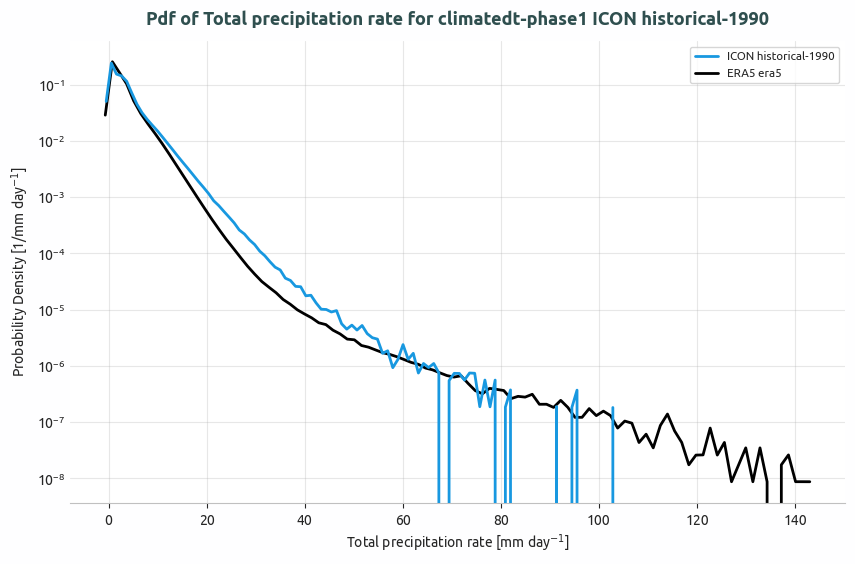

2026-02-16 23:44:34 :: PlotHistogram :: INFO     -> PlotHistogram completed successfully


In [5]:
# Setup plot with model data and reference
plot = PlotHistogram(
    data=[hist_dataset.histogram_data],  # Note: needs to be a list
    ref_data=hist_obs.histogram_data,    # Reference data
    loglevel='INFO'
)

# Generate and save the plot
plot.run(
    ylogscale=True,    # Logarithmic scale for y-axis (frequency)
    xlogscale=False,   # Linear scale for x-axis (precipitation)
    smooth=False,      # No smoothing applied
    show=True,         # Show the plot
)